## Projeto de Previsão de Turnover de Funcionários
Este projeto tem como objetivo identificar colaboradores com maior probabilidade de desligamento por meio da análise de variáveis comportamentais, demográficas e organizacionais. A partir da modelagem preditiva, é possível antecipar riscos de rotatividade e apoiar a gestão na tomada de decisões estratégicas. Utilizamos um conjunto de dados do IBM HR Analytics, aplicando técnicas de aprendizado de máquina para construir um modelo de classificação que fornece insights acionáveis ​​para a estratégia de RH.


### Principais Objetivos
1. Carregar e explorar o conjunto de dados
2. Realizar a limpeza e o pré-processamento dos dados
3. Construir e avaliar modelos de aprendizado de máquina
4. Identificar os principais fatores da saida de um colaborador e escolha de um modelo preditivo.

### 1 - Importação das Bibliotecas
Nesta etapa, são importadas as bibliotecas responsáveis pela manipulação, análise e modelagem dos dados.

Utilizamos Pandas para tratamento e estruturação do dataset, Scikit-learn para construção e treinamento dos modelos preditivos, além de Seaborn e Matplotlib para visualização e análise exploratória.

In [1]:
# INSTALAÇÃO
# pip install seaborn
# pip install kagglehub
# pip install matplotlib
# pip install scikit-learn
# pip install xgboost


# IMPORTAÇÃOS DAS BIBLIOTECAS

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score
)


C:\Users\1964\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 2 - Carregamento do Conjunto de Dados

Nesta etapa, realizamos o carregamento do dataset IBM HR Analytics, disponibilizado pela IBM, estruturando-o em um DataFrame do Pandas para posterior análise.

O conjunto contém variáveis relacionadas a cargo, remuneração, nível de satisfação, tempo de empresa e outros fatores organizacionais relevantes. Esses atributos serão fundamentais para identificar padrões comportamentais e construir um modelo capaz de prever a rotatividade (attrition) de colaboradores.

In [2]:
# CARREGAMENTO DOS DADOS
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")
df = pd.read_csv(f"{path}/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 3 - Análise Exploratória de Dados (EDA)
Nesta etapa, exploramos o dataset para compreender sua estrutura, identificar inconsistências e extrair insights iniciais. Foram verificadas estatísticas descritivas, distribuição de variáveis e padrões de rotatividade.

#### Principais insights:

O dataset contém 1.470 registros e 35 variáveis (numéricas e categóricas).

Sem valores nulos, garantindo integridade para modelagem.

Distribuição de rotatividade: 84% permanecem na empresa (No) e 16% foram desligados (Yes).

#### Fatores de maior risco de saída:

Funcionários que realizam hora extra apresentam rotatividade significativamente maior.

Baixa satisfação aumenta a probabilidade de desligamento.

Ser solteiro tem maior associação positiva com a saída (r ≈ 0,25).

#### Fatores que reduzem o risco de saída:

Níveis hierárquicos mais altos (r ≈ -0,17)

Maior remuneração (r ≈ -0,16)

Tempo de empresa (r ≈ -0,13)

Tempo com o gestor direto (r ≈ -0,16)

Essa análise fundamenta a seleção de variáveis para o modelo preditivo e evidencia padrões comportamentais importantes para decisões estratégicas de RH.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

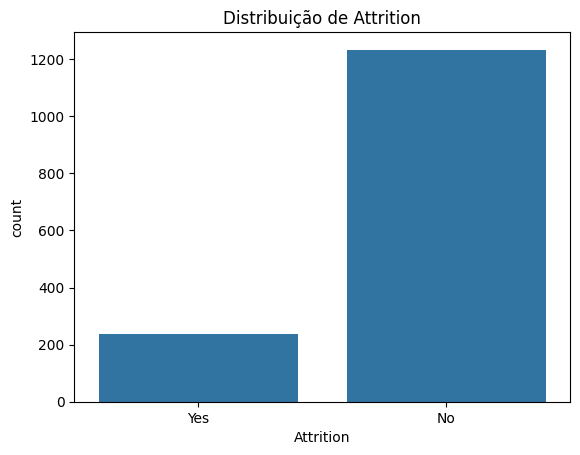

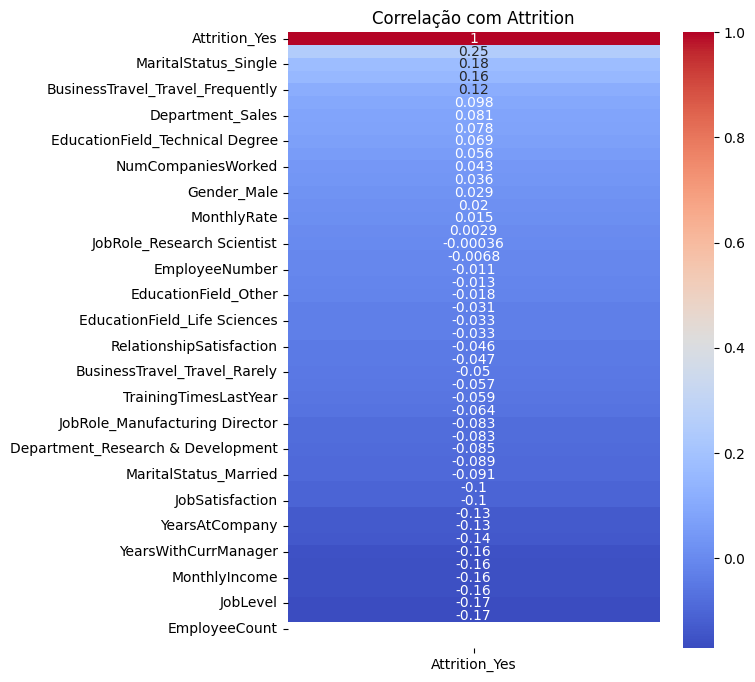

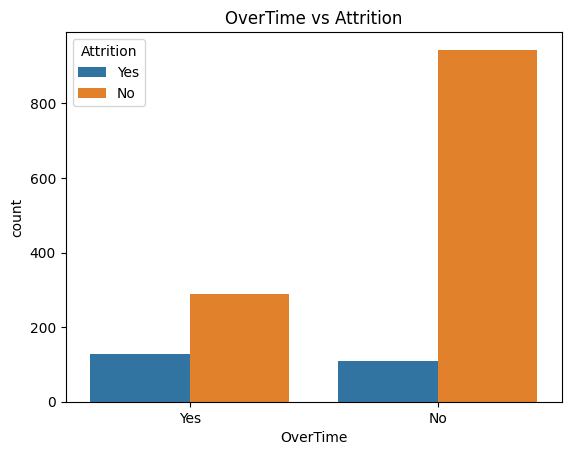

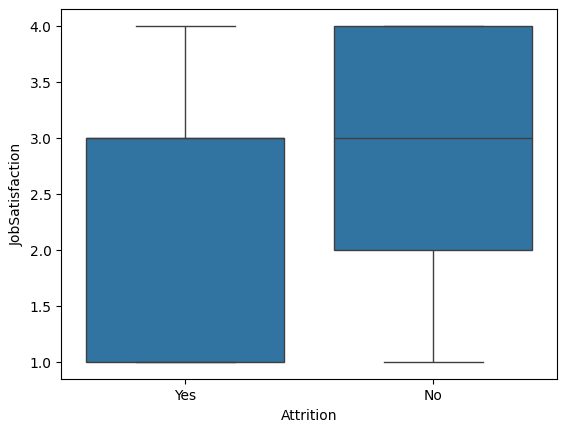

In [3]:
#Checando a estrutura do dataset
df.shape
df.info()

#Checando valor nulo no dataset
print("\nMissing Values Count:\n")
df.isnull().sum()

# Contagem de número de funcionários desligados e ativos na compania
sns.countplot(x='Attrition', data=df)
plt.title("Distribuição de Attrition")
plt.show()
df['Attrition'].value_counts(normalize=True)
## ATTRITION = NO ~ 84% e YES ~16%  - EXISTE DESBALANCEAMENTO MODERADO


## MATRIZ DE CORRELAÇÃO
df_encoded = pd.get_dummies(df, drop_first=True)
corr = df_encoded.corr()['Attrition_Yes'].sort_values(ascending=False)
plt.figure(figsize=(6,8))
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlação com Attrition")
plt.show()

## Gráfico Barras Hora Extra e Desligamento
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("OverTime vs Attrition")
plt.show()
#Funcionários que fazem hora extra têm taxa muito maior de saída.

## Gráfico Barras Satisfação Trabalho e Desligamento
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.show()
#Baixa satisfação aumenta risco de turnover.


### 4 - PRÉ-PROCESSAMENTO DOS DADOS
Antes da modelagem, realizamos o pré-processamento para preparar o dataset para algoritmos de aprendizado de máquina.

Variáveis categóricas foram transformadas em valores numéricos utilizando Label Encoding, garantindo compatibilidade com os modelos.

Esta etapa assegura que os recursos estejam estruturados e prontos para a construção de modelos preditivos confiáveis.

In [4]:
# Remover colunas irrelevantes
df = df.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1)

# Tranformar Variáveis Categóricas em Formato Numéricos 'One-hot encoding'
df = pd.get_dummies(df, drop_first=True)

# Separa X e Y
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']


### 5 - DIVISÃO DOS DADOS EM TREINO E TESTE
Para avaliar a performance do modelo de forma confiável, o dataset foi dividido em conjuntos de treino e teste:

75% dos dados para treino e 25% para teste (test_size=0.25).

random_state=42 garante reprodutibilidade da divisão.

stratify=y mantém a mesma proporção da variável alvo nos dois conjuntos, preservando o equilíbrio entre as classes e reduzindo viés de amostragem.

Essa abordagem permite testar o modelo em dados não vistos e minimiza o risco de overfitting, garantindo resultados mais robustos.

In [5]:
# DIVISÃO TREINO / TESTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

### 6 - FUNÇÃO PARA COMPARAÇÃO DOS MODELOS
Desenvolvemos uma função para treinar, avaliar e comparar modelos de classificação de forma padronizada.

Ajusta o modelo aos dados de treino e realiza previsões no conjunto de teste.

Calcula métricas essenciais: Recall, Precision, F1-Score e AUC, além da matriz de confusão (TN, FP, FN, TP).

Compara a AUC de treino e teste para identificar potenciais sinais de overfitting.

Retorna os resultados de forma estruturada, permitindo comparar diferentes modelos de maneira consistente e organizada.

In [6]:
# FUNÇÃO PARA AVALIAÇÃO DOS MODELOS

def avaliar_modelo(model, X_train, X_test, y_train, y_test, nome):
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Matriz de confusão
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    
    # Métricas
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    # Overfitting check
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
    
    print(f"\n==== {nome} ====")
    print(f"TN: {TN}")
    print(f"FP: {FP}")
    print(f"FN: {FN}  <-- CRÍTICO")
    print(f"TP: {TP}")
    print(f"Recall: {recall:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"F1: {f1:.3f}")
    print(f"AUC Teste: {auc:.3f}")
    print(f"AUC Treino: {auc_train:.3f}")
    print(f"Overfitting (diferença AUC): {(auc_train-auc):.3f}")
    
    return {
        "Modelo": nome,
        "TN": TN,
        "FP": FP,
        "FN": FN,
        "TP": TP,
        "Recall": recall,
        "Precision": precision,
        "F1": f1,
        "AUC": auc,
        "Overfit": auc_train-auc
    }


### 7 - CONSTRUÇÃO DOS MODELOS PREDITIVOS 
Nesta etapa, aplicamos três algoritmos de classificação para prever o turnover: Regressão Logística, Random Forest e XGBoost.

Consideramos o desbalanceamento da base, utilizando class_weight='balanced' ou scale_pos_weight para penalizar corretamente a classe minoritária.

Realizamos ajuste de hiperparâmetros (número de árvores, profundidade, taxa de aprendizado) para otimizar a performance.

Cada modelo foi treinado e avaliado com a função padronizada de métricas, permitindo comparar desempenho, capacidade preditiva e identificar risco de overfitting.

In [7]:
## MODELOS PREDITIVOS

# REGRESSÃO LOFISITCA
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
res_lr = avaliar_modelo(lr, X_train, X_test, y_train, y_test, "Logistic")

# RANDOM FOREST
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)

res_rf = avaliar_modelo(rf, X_train, X_test, y_train, y_test, "Random Forest")

#XGBOOST
scale_weight = (len(y_train) - sum(y_train)) / sum(y_train)

xgb = XGBClassifier(
    learning_rate=0.05,
    n_estimators=400,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_weight,
    eval_metric='logloss'
)

res_xgb = avaliar_modelo(xgb, X_train, X_test, y_train, y_test, "XGBoost")



C:\Users\1964\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



==== Logistic ====
TN: 231
FP: 78
FN: 20  <-- CRÍTICO
TP: 39
Recall: 0.661
Precision: 0.333
F1: 0.443
AUC Teste: 0.775
AUC Treino: 0.805
Overfitting (diferença AUC): 0.030

==== Random Forest ====
TN: 305
FP: 4
FN: 53  <-- CRÍTICO
TP: 6
Recall: 0.102
Precision: 0.600
F1: 0.174
AUC Teste: 0.762
AUC Treino: 1.000
Overfitting (diferença AUC): 0.238

==== XGBoost ====
TN: 291
FP: 18
FN: 41  <-- CRÍTICO
TP: 18
Recall: 0.305
Precision: 0.500
F1: 0.379
AUC Teste: 0.757
AUC Treino: 1.000
Overfitting (diferença AUC): 0.243


### 8 - ESCOLHA DO MODELO
Apesar de Random Forest e XGBoost apresentarem AUC semelhantes (~0,76), a Regressão Logística se destaca naquilo que mais importa para o negócio: identificar colaboradores com risco de saída.

Recall: 66% (vs. 30% XGBoost / 10% Random Forest)

Menor número de falsos negativos: 20

F1-Score mais alto: 0,44

Overfitting reduzido: 0,03, garantindo melhor generalização

Considerando que o objetivo principal é reduzir o turnover inesperado, priorizando a detecção de casos de risco, a Regressão Logística se mostra o modelo mais adequado para suportar decisões estratégicas de RH.

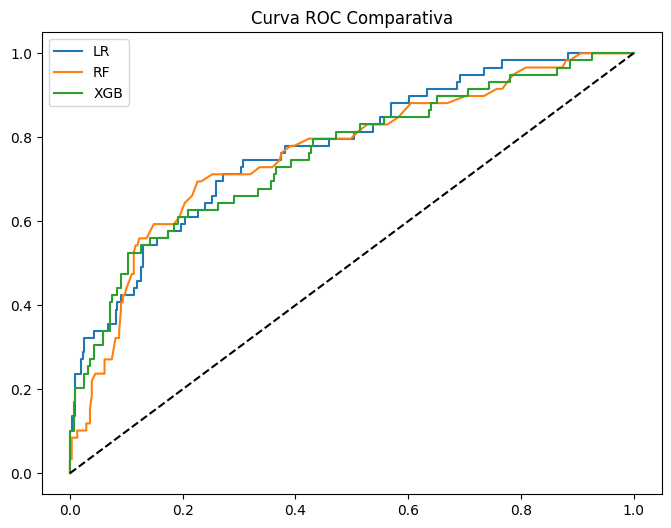

,Modelo,TN,FP,FN,TP,Recall,Precision,F1,AUC,Overfit
0,Logistic,231,78,20,39,0.661017,0.333333,0.443182,0.774615,0.030288
2,XGBoost,291,18,41,18,0.305085,0.500000,0.378947,0.756733,0.243267
1,Random Forest,305,4,53,6,0.101695,0.600000,0.173913,0.761533,0.238467


In [8]:
#CURVA ROC 
plt.figure(figsize=(8,6))

for model, nome in [(lr,"LR"), (rf,"RF"), (xgb,"XGB")]:
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=nome)

plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.title("Curva ROC Comparativa")
plt.show()

# COMPARATIVO MODELO
resultados = pd.DataFrame([res_lr, res_rf, res_xgb])
resultados.sort_values(by="FN")


### 9 - ANÁLISE DA SAIDA DO MODELO ESCOLHIDO

Analisando a saída do modelo de Regressão Logística, observamos um AUC = 0,77, indicando boa capacidade de discriminação entre colaboradores que permanecem e aqueles que se desligam.

O recall da classe de desligamento foi de 0,66, ou seja, 66% das saídas reais foram corretamente previstas, com 20 falsos negativos.

Insights sobre risco de turnover:

Funcionários que fazem hora extra: +69% de chance de saída

Ser solteiro: +40%

Trabalhar em Sales: +29%

Cada aumento no nível de stock option: -32%

Maior satisfação com o ambiente: -25%

Diante desses resultados, o modelo apresenta boa capacidade preditiva e fornece insights relevantes para gestão de turnover, sendo uma escolha adequada para análise e tomada de decisão.

Nota:Para interpretar as probabilidades, os coeficientes do modelo devem ser transformados usando exp(coef).

===== MATRIZ DE CONFUSÃO =====
[[231  78]
 [ 20  39]]

===== CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

       False       0.92      0.75      0.82       309
        True       0.33      0.66      0.44        59

    accuracy                           0.73       368
   macro avg       0.63      0.70      0.63       368
weighted avg       0.83      0.73      0.76       368


===== AUC =====
AUC: 0.7746

===== COEFICIENTES (ordenados por impacto) =====
                             Variável  Coeficiente
43                       OverTime_Yes     0.523976
15                   StockOptionLevel    -0.383896
42               MaritalStatus_Single     0.333666
4             EnvironmentSatisfaction    -0.290493
26                   Department_Sales     0.254172
8                     JobSatisfaction    -0.221403
23   BusinessTravel_Travel_Frequently     0.221163
13                  PerformanceRating     0.200015
34      JobRole_Laboratory Technician     0.18

C:\Users\1964\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


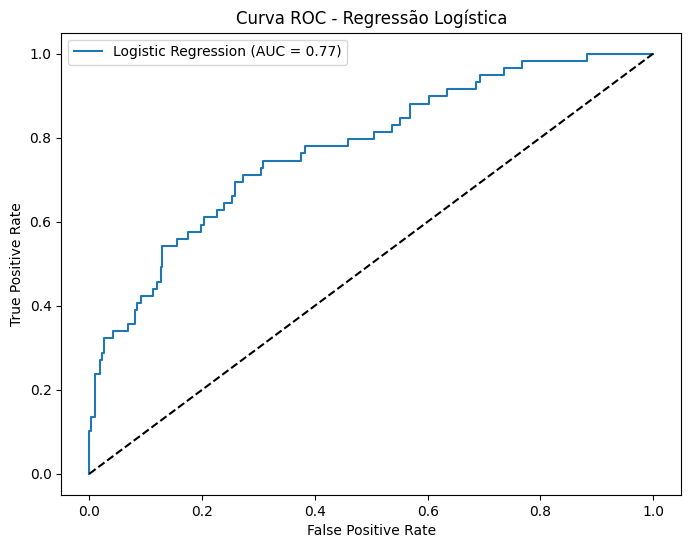

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =========================
# TREINAR MODELO
# =========================

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)

# =========================
# PREDIÇÕES
# =========================

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

# =========================
# MÉTRICAS
# =========================

cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("===== MATRIZ DE CONFUSÃO =====")
print(cm)

print("\n===== CLASSIFICATION REPORT =====")
print(classification_report(y_test, y_pred))

print("\n===== AUC =====")
print(f"AUC: {auc:.4f}")

# =========================
# COEFICIENTES
# =========================

coeficientes = pd.DataFrame({
    "Variável": X_train.columns,
    "Coeficiente": lr.coef_[0]
}).sort_values(by="Coeficiente", key=abs, ascending=False)

print("\n===== COEFICIENTES (ordenados por impacto) =====")
print(coeficientes)

print("\nIntercepto:")
print(lr.intercept_[0])

# =========================
# CURVA ROC
# =========================

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regressão Logística")
plt.legend()
plt.show()

### 10 - RESUMO E CONCLUSÃO

Neste projeto, desenvolvemos um modelo de aprendizado de máquina para prever a rotatividade de funcionários com base no dataset IBM HR Analytics.

#### Passos realizados:

Exploração e limpeza dos dados;

Codificação de variáveis categóricas;

Construção e comparação de três modelos de classificação.

A Regressão Logística se destacou como o modelo mais eficaz, oferecendo insights valiosos sobre os principais fatores que influenciam a saída de colaboradores, auxiliando decisões estratégicas de RH para reduzir o turnover.

#### Próximos Passos

Aprimorar o modelo para aumentar a capacidade preditiva (AUC atual: 0,77).

Validar e implementar com dados reais da empresa para aplicação prática e tomada de decisão.